In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as bk
import numpy as np
import glob
import os
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
no_of_epoch = 40
batch_size = 3
target_size = (100, 100)
input_shape = (100, 100, 3)

In [3]:
train_path = '/content/drive/MyDrive/GreatLearning/Hackthon/HDFCLife/train'
test_path = '/content/drive/MyDrive/GreatLearning/Hackthon/HDFCLife/test'

In [4]:
test_dataset = []
file_ids = []
testData =  glob.glob('{}/*.jpg'.format(test_path))
for data in testData:
  img = tf.keras.preprocessing.image
  image = img.load_img(data, color_mode='rgb', target_size= target_size)
  image = np.array(image)
  file_id = os.path.basename(data).replace('.jpg', '')
  test_dataset.append(image)
  file_ids.append(int(file_id))

In [5]:
imageDataGen = ImageDataGenerator(rescale= 1./ 255,
                                 horizontal_flip=True, 
                                 validation_split=0.2)



train_generator = imageDataGen.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    #class_mode='categorical',
    subset='training') # set as training data

validation_generator = imageDataGen.flow_from_directory(
    train_path, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    #class_mode='categorical',
    subset='validation') # set as validation data

Found 473 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [6]:
lables = train_generator.class_indices
output_layer_len=len(lables)
lables_list = list(train_generator.class_indices.keys())

In [7]:
print("Length of Output layer: {}".format(output_layer_len))
print("Lable List: {}".format(lables_list))

Length of Output layer: 2
Lable List: ['Mask', 'NoMask']


In [8]:
model = Sequential()
model.add(Conv2D(100, kernel_size=(3,3), input_shape = input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(output_layer_len, activation='sigmoid'))

In [9]:
from keras.optimizers import SGD, Adam
optimizer = SGD(learning_rate=0.1)

In [10]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 100)       2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0         
_________________________________________________________________
dropout (Dropout)            (None, 52900)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                2

In [12]:
with tf.device('/device:GPU:0'):
  model.fit(train_generator ,epochs=no_of_epoch, validation_data=validation_generator)

Epoch 1/40
158/158 [==============================] - 6s 25ms/step - loss: 0.6593 - accuracy: 0.7663 - val_loss: 0.5283 - val_accuracy: 0.8136
Epoch 2/40
158/158 [==============================] - 4s 23ms/step - loss: 0.5247 - accuracy: 0.7981 - val_loss: 0.4795 - val_accuracy: 0.8136
Epoch 3/40
158/158 [==============================] - 4s 23ms/step - loss: 0.4615 - accuracy: 0.8302 - val_loss: 0.4772 - val_accuracy: 0.8136
Epoch 4/40
158/158 [==============================] - 4s 23ms/step - loss: 0.4553 - accuracy: 0.8335 - val_loss: 0.4811 - val_accuracy: 0.8136
Epoch 5/40
158/158 [==============================] - 4s 23ms/step - loss: 0.4905 - accuracy: 0.8087 - val_loss: 0.4768 - val_accuracy: 0.8136
Epoch 6/40
158/158 [==============================] - 4s 23ms/step - loss: 0.4684 - accuracy: 0.8222 - val_loss: 0.4796 - val_accuracy: 0.8136
Epoch 7/40
158/158 [==============================] - 4s 23ms/step - loss: 0.4731 - accuracy: 0.8174 - val_loss: 0.4851 - val_accuracy: 0.8136

In [13]:
training_history_model = model.history

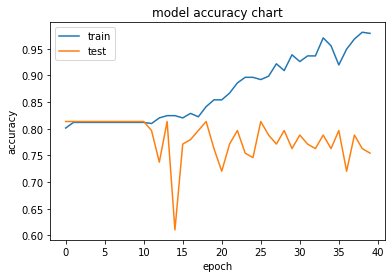

In [14]:
plt.plot(training_history_model.history['accuracy'])
plt.plot(training_history_model.history['val_accuracy'])
plt.title('model accuracy chart')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

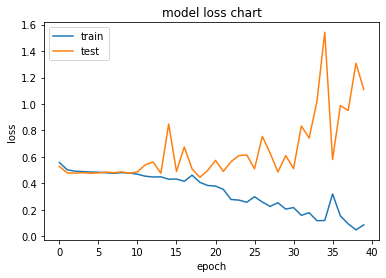

In [15]:
# summarize history for loss
plt.plot(training_history_model.history['loss'])
plt.plot(training_history_model.history['val_loss'])
plt.title('model loss chart')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
pred_test_result_m1 = []
for file_id, img in zip(file_ids, test_dataset):
  exp_img = np.expand_dims(img, axis=0)
  val_dataset_pred = model.predict(exp_img)
  pred_val = np.argmax(val_dataset_pred)
  pred_val_lable = lables_list[pred_val]
  val_dataset_pred_lable = None
  if pred_val_lable == 'Mask':
    val_dataset_pred_lable = 1
  else:
    val_dataset_pred_lable = 0
  result = [file_id,  val_dataset_pred_lable, pred_val_lable]
  print(result)
  pred_test_result_m1.append(result)

[41, 1, 'Mask']
[39, 1, 'Mask']
[27, 1, 'Mask']
[35, 1, 'Mask']
[45, 1, 'Mask']
[38, 1, 'Mask']
[32, 1, 'Mask']
[31, 0, 'NoMask']
[29, 0, 'NoMask']
[9, 1, 'Mask']
[1, 0, 'NoMask']
[26, 1, 'Mask']
[24, 1, 'Mask']
[21, 1, 'Mask']
[28, 1, 'Mask']
[7, 1, 'Mask']
[42, 0, 'NoMask']
[44, 1, 'Mask']
[25, 1, 'Mask']
[12, 1, 'Mask']
[6, 1, 'Mask']
[43, 1, 'Mask']
[0, 1, 'Mask']
[10, 1, 'Mask']
[19, 1, 'Mask']
[4, 1, 'Mask']
[3, 1, 'Mask']
[18, 1, 'Mask']
[15, 1, 'Mask']
[37, 0, 'NoMask']
[14, 1, 'Mask']
[16, 0, 'NoMask']
[23, 1, 'Mask']
[2, 1, 'Mask']
[11, 1, 'Mask']
[17, 1, 'Mask']
[30, 1, 'Mask']
[20, 1, 'Mask']
[40, 0, 'NoMask']
[13, 1, 'Mask']
[22, 1, 'Mask']
[33, 0, 'NoMask']
[34, 1, 'Mask']
[8, 1, 'Mask']
[36, 1, 'Mask']
[5, 1, 'Mask']


In [21]:
pred_test_result_m1_df = pd.DataFrame(pred_test_result_m1, columns=['file_id', 'label', 'label_value'])
pred_test_result_m1_df.sort_values(by='file_id')

,file_id,label,label_value
22,0,1,Mask
10,1,0,NoMask
33,2,1,Mask
26,3,1,Mask
25,4,1,Mask
45,5,1,Mask
20,6,1,Mask
15,7,1,Mask
43,8,1,Mask
9,9,1,Mask


In [22]:
subbmit_m1 = pred_test_result_m1_df.drop(['label_value'], axis=1)
subbmit_m1.to_csv('HDFC_Hackthon_Submit_14.csv', index=False)